<a href="https://colab.research.google.com/github/k-messick/ds1002-vmv6mp/blob/main/homework/week-15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework - Week 15

Complete the following blocks as specified in the directions. Run each cell to return the desired output. Save your notebook back to your GitHub repository and submit the GitHub URL to your notebook for review.

## 1. Create Functions (4 pts)

Create two functions in the cells below, according to the prompts given.

In [2]:
# create a function in R that:
#   1. takes a single integer as an input parameter
#   2. determines whether the integer is even or odd
#   3. returns a character statement "The integer <x> is even" or "The integer <x> is odd" (replace <x> with the actual input provided)
#
# then execute the function twice using two different input values, displaying even and odd results.

determine <- function(x){ if (x == 13) {
    return("The integer 13 is odd")
  } else {
    return("The integer 14 is even")
  }
}

In [3]:
determine(13)

[1] "The integer 13 is odd"

In [4]:
determine(14)

[1] "The integer 14 is even"

In [5]:
# create a function in R that:
#   1. takes 4 integer input parameters
#   2. returns the mean value of the inputs
#   3. has default values for the 4 input parameters, in case they are not provided when the function is called.
#
# then execute the function twice: once where you provide the input values, and once where you do not.


compute_mean <- function(default1 = 6, default2 = 8, default3 = 70, default4 = 92) {
  input_mean <- mean(c(default1, default2, default3, default4))
}

In [6]:
print(compute_mean(15, 4, 3, 62))

[1] 21


In [7]:
print(compute_mean())

[1] 44


## 2. Plot Data (4 pts)

In the cell below, write the code required to plot from the `msleep` sample data set.

1. Display only animals with body weights of 30 or greater.
2. Group the animals by `order`.
3. Display the mean `sleep_total` for each group in a bar plot.

In [8]:
#
library(tidyverse)
install.packages("msleep")
library(ggplot2)
data(msleep)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘msleep’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


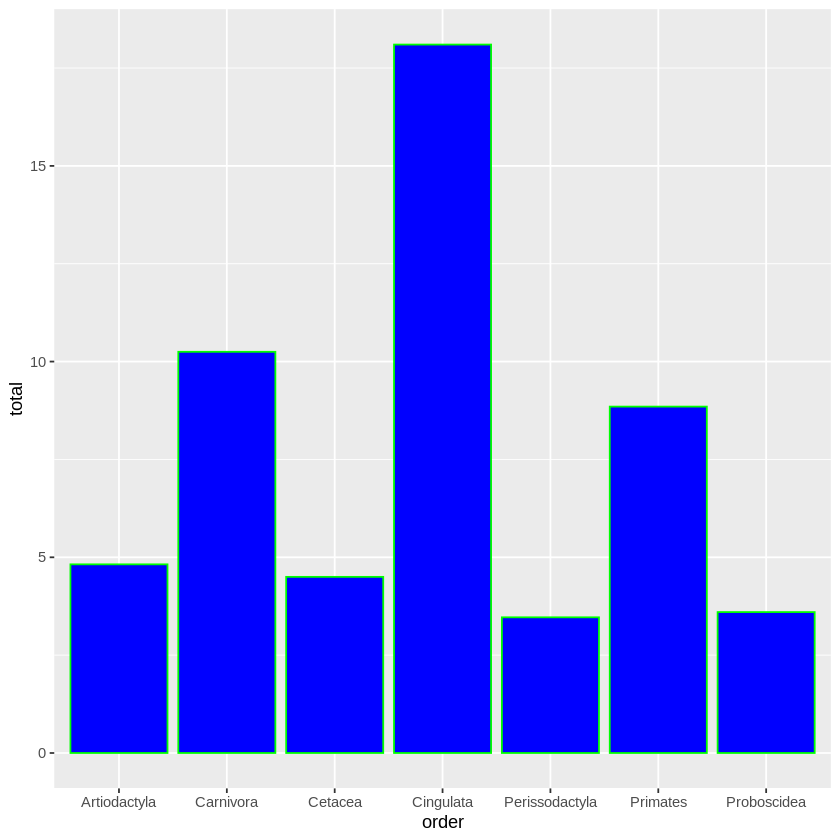

In [9]:
filtered <- msleep %>%
  select(name,	genus,	vore,	order,	conservation,	sleep_total,	sleep_rem,	sleep_cycle,	awake,	brainwt,	bodywt) %>%
  filter(bodywt >= 30) %>%
  group_by(order) %>%
  summarise(total = mean(sleep_total))

ggplot(filtered, aes(x=order, y=total)) + geom_bar(stat="identity", fill="blue",color="green")

## 3. Clean and Analyze Data Using R (4 pts)

In the cells below use R to perform the following data cleaning steps on this file:
https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv

1. Remove any duplicate rows.
2. Remove any records where `last_login` or `birthdate` are empty.
3. Display only the records with the 10 highest `follower` counts.
4. Determine counts of users when grouped by continent.

In [10]:
df <- read.csv("https://raw.githubusercontent.com/nmagee/ds1002/main/data/social-media-users.csv")

In [11]:
#
df2 <- df[!duplicated(df), ]

In [12]:
df3 <- df2 %>%
  select(username,full_name,birthdate,email,continent,followers,last_login,interests) %>%
  filter(!df2$birthdate==''&!df2$last_login=='')

In [13]:
#
df3 %>%
  select(username,full_name,birthdate,email,continent,followers,last_login,interests) %>%
  arrange(desc(followers)) %>%
  head(10)

,username,full_name,birthdate,email,continent,followers,last_login,interests
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,lleckeyb6,Lynne Leckey,4/19/1998,lleckeyb6@tripadvisor.com,SA,99977,3/14/2021,sports
2,spharoaha2,Staci Pharoah,9/2/1985,spharoaha2@sfgate.com,NA,99905,10/26/2023,sports
3,cduftondy,Celisse Dufton,8/24/1995,cduftondy@ox.ac.uk,OC,99707,9/26/2021,sports
4,dbartalin77,Desiree Bartalin,8/23/1993,dbartalin77@usda.gov,AF,99618,5/30/2022,music
5,grivardmp,Gwen Rivard,9/12/1982,grivardmp@google.com.hk,OC,99526,4/4/2020,music
6,mraggitt9g,Morgan Raggitt,11/16/1992,mraggitt9g@home.pl,NA,99508,11/12/2021,music
7,wbenese7,Wain Benes,3/9/1998,wbenese7@ebay.com,NA,99400,10/1/2021,travel
8,kmorriceht,Kitti Morrice,6/3/1995,kmorriceht@privacy.gov.au,SA,98936,3/24/2021,sports
9,smacdonnell7o,Shoshanna MacDonnell,9/12/2002,smacdonnell7o@toplist.cz,AS,98760,7/20/2021,music


In [14]:
counts <- df3 %>%
  group_by(continent)%>%
  summarise(user_count=n())
counts

continent,user_count
<chr>,<int>
AF,70
AS,111
EU,77
OC,95
SA,69
NA,228
